# Descente de gradient et méthode de Newton


## Cas 1 : Fonction convexe de $R^2$ dans $R$ 

In [1]:
# Imports from the matplotlib library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
# --------------------------------------

# Definition of what to plot

fig = plt.figure() # opens a figure environment
ax = fig.gca(projection='3d') # to perform a 3D plot
X = np.arange(-2, 2, 0.25) # x range
Y = np.arange(-2, 2, 0.25) # y range
X, Y = np.meshgrid(X, Y) # creates a rectangular grid on which to plot the function values (Z)
Z= 2*X**3 + 2*Y**3 + X**2*Y + X*Y**2 - 9*X - 9*Y # defines the function values
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False)  # plot definition and options

# Runs the plot command
plt.show()


1. Tracer dans matplotlib la fonction et repérer le minimum global et (éventuellement) les minima locaux. Commenter


In [2]:
ax = fig.gca(projection='3d') # to perform a 3D plot
x = np.arange(-2, 2, 0.25)  # x range
y = np.arange(-2, 2, 0.25)  # y range
x, y = np.meshgrid(x, y)
z = (x-y)**4 +2*x**2 + y**2 - x + 2
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, antialiased=False)  # plot definition and options
plt.show()

la première question est qualitative, on voit que le minimum global se situe au point (0,0)
la fonction est positive et donc elle atteint son minimum quand elle s'annule

 2. Calculer le gradient g de la fonction f. Quelle est son expression?

$\vec{\nabla} f(x,y)=\begin{pmatrix}4(x-y)^3+4x-1 \\-4(x-y)^3+2y+2 \end{pmatrix} $

3. Implémenter la méthode de descente de gradient. Testez les diﬀérents critères d’arrêt vus en classe et commentez (commencez par le plus facile).

In [3]:
def gradient(x,y) :
    x1 = 4*(x-y)**3+4*x-1
    x2 = -4*(x-y)**3+2*y+2
    return np.array([x1,x2])

In [4]:
gradient(1,-1)

array([ 35, -32])

In [5]:
def descent(init,delta,niter,eps) :
    vect = init
    n = 0
    while (gradient(vect[0],vect[1])[0]**2 + (gradient(vect[0],vect[1])[1]**2)**0.5) > eps and n < niter :
        # delta = 1/(gradient(vect[0],vect[1])[0]**2 + (gradient(vect[0],vect[1])[1]**2)**0.5)
        vect -= delta*gradient(vect[0],vect[1])
        init = vect
        n += 1
        #print(vect)
    return vect, n
        
    

In [6]:
descent([1,1],0.1,100, 0.01)

(array([ 0.03617814, -0.56360011]), 18)

In [16]:
descent([1,1],0.2,1000, 0.1)

(array([ 0.15870509, -0.62363743]), 1000)

Hessian matrix

$ H_{f(x,y)}= \begin{pmatrix}12(x-y)^2+4 & -12(x-y)^2 \\ -12(x-y)^2 & 12(x-y)^2 +2 \end{pmatrix}$

In [21]:
def Hessian(X): #X est un vecteur
    return 12*((X[0]-X[1])**2)*np.array([[1,-1],[-1,1]])+np.array([[4,0],[0,2]])

print(Hessian([1,1]))

[[4 0]
 [0 2]]


In [56]:
def Newton(V, niter, eps):
    n=0
    while (gradient(V[0],V[1])[0]**2 + gradient(V[0],V[1])[1]**2)**0.5 > eps and n < niter:
        V= V - gradient(V[0],V[1]).dot(np.linalg.inv(Hessian(V)))
        n= n + 1
    return (V,n)

print(Newton([1,1],1000,0.001))

(array([ 0.03349877, -0.56699754]), 5)


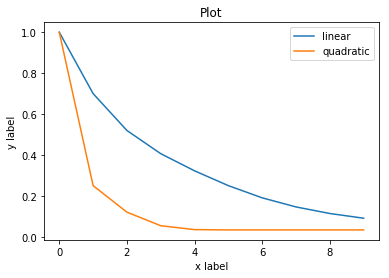

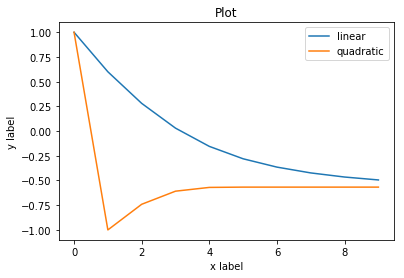

In [73]:
def trajectory(init, niter, delta, eps):
    x = range(niter)
    pointsLx = []
    pointsQx = []
    pointsLy = []
    pointsQy = []
    for i in range(niter):
        pointsLx.append(descent(init, delta, i, eps)[0][0])
        pointsQx.append(Newton(init, i, eps)[0][0])
        pointsLy.append(descent(init, delta, i, eps)[0][1])
        pointsQy.append(Newton(init, i, eps)[0][1])
    
    plt.plot(x, pointsLx, label='linear')
    plt.plot(x, pointsQx, label='quadratic')
    plt.xlabel('x label')
    plt.ylabel('y label')
    plt.title("Plot")
    plt.legend()
    plt.show()
    
    plt.plot(x, pointsLy, label='linear')
    plt.plot(x, pointsQy, label='quadratic')
    plt.xlabel('x label')
    plt.ylabel('y label')
    plt.title("Plot")
    plt.legend()
    plt.show()

trajectory([1,1],10, 0.1, 0.01)